In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data

In [3]:
data = pd.read_csv('MPI National.csv')
data.head()

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9


## Performing Data Analysis

In [5]:
# Finding the country with the highest and lowest population suffering from poverty based on headcount ratios
highest_poverty_urban = data[['Country', 'Headcount Ratio Urban']].sort_values(by='Headcount Ratio Urban', ascending=False).head(1)
lowest_poverty_urban = data[['Country', 'Headcount Ratio Urban']].sort_values(by='Headcount Ratio Urban', ascending=True).head(1)

highest_poverty_rural = data[['Country', 'Headcount Ratio Rural']].sort_values(by='Headcount Ratio Rural', ascending=False).head(1)
lowest_poverty_rural = data[['Country', 'Headcount Ratio Rural']].sort_values(by='Headcount Ratio Rural', ascending=True).head(1)

print('Highest Poverty Urban:\n', highest_poverty_urban, "\n")
print('Lowest Poverty Urban:\n', lowest_poverty_urban, "\n")
print('Highest Poverty Rural:\n', highest_poverty_rural, "\n")
print('Lowest Poverty Rural:\n', lowest_poverty_rural)

Highest Poverty Urban:
          Country  Headcount Ratio Urban
101  South Sudan                   82.5 

Lowest Poverty Urban:
       Country  Headcount Ratio Urban
0  Kazakhstan                    0.0 

Highest Poverty Rural:
     Country  Headcount Ratio Rural
99  Somalia                  96.92 

Lowest Poverty Rural:
       Country  Headcount Ratio Rural
0  Kazakhstan                   0.09


In [7]:
# Comparing urban vs. rural poverty to see if any countries have significant differences
data['Urban-Rural Poverty Difference'] = data['Headcount Ratio Urban'] - data['Headcount Ratio Rural']
largest_difference = data[['Country', 'Urban-Rural Poverty Difference']].sort_values(by='Urban-Rural Poverty Difference', ascending=False).head(1)
smallest_difference = data[['Country', 'Urban-Rural Poverty Difference']].sort_values(by='Urban-Rural Poverty Difference', ascending=True).head(1)

print('Largest difference:\n', largest_difference, '\n')
print('Smallest difference:\n', smallest_difference)

Largest difference:
      Country  Urban-Rural Poverty Difference
17  Barbados                            0.53 

Smallest difference:
      Country  Urban-Rural Poverty Difference
76  Djibouti                          -55.98


In [9]:
# Countries with the highest intensity of deprivation in both urban and rural areas
highest_deprivation_urban = data[['Country', 'Intensity of Deprivation Urban']].sort_values(by='Intensity of Deprivation Urban', ascending=False).head(1)
highest_deprivation_rural = data[['Country', 'Intensity of Deprivation Rural']].sort_values(by='Intensity of Deprivation Rural', ascending=False).head(1)

print('Highest deprivation urban:\n', highest_deprivation_urban, '\n')
print('Highest deprivation rural:\n', highest_deprivation_rural)

Highest deprivation urban:
          Country  Intensity of Deprivation Urban
101  South Sudan                            55.7 

Highest deprivation rural:
    Country  Intensity of Deprivation Rural
96   Niger                            69.5


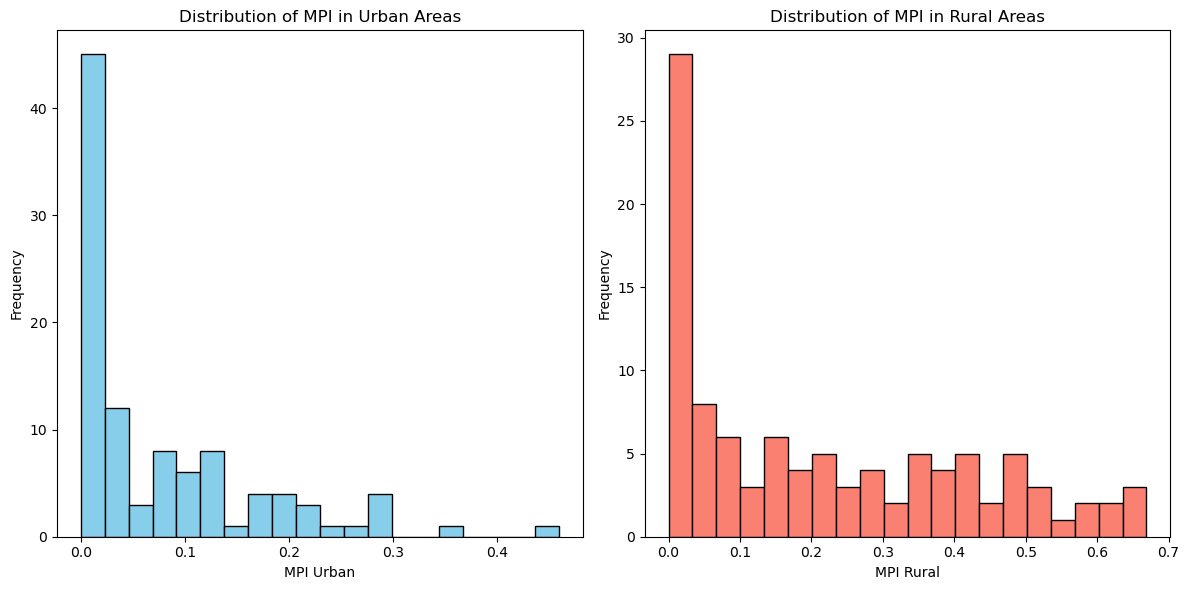

In [11]:
# Plotting the distribution of MPI for Urban and Rural areas
plt.figure(figsize=(12, 6))

# MPI Urban distribution
plt.subplot(1, 2, 1)
plt.hist(data['MPI Urban'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of MPI in Urban Areas')
plt.xlabel('MPI Urban')
plt.ylabel('Frequency')

# MPI Rural distribution
plt.subplot(1, 2, 2)
plt.hist(data['MPI Rural'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of MPI in Rural Areas')
plt.xlabel('MPI Rural')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
# Correlation matrix 
correlation_matrix = data[['MPI Urban', 'Headcount Ratio Urban', 'Intensity of Deprivation Urban', 
                           'MPI Rural', 'Headcount Ratio Rural', 'Intensity of Deprivation Rural']].corr()
correlation_matrix

,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
MPI Urban,1.000000,0.995981,0.880024,0.922065,0.887147,0.884069
Headcount Ratio Urban,0.995981,1.000000,0.884032,0.939615,0.913555,0.896901
Intensity of Deprivation Urban,0.880024,0.884032,1.000000,0.892678,0.878833,0.904428
MPI Rural,0.922065,0.939615,0.892678,1.000000,0.986750,0.966458
Headcount Ratio Rural,0.887147,0.913555,0.878833,0.986750,1.000000,0.940608
Intensity of Deprivation Rural,0.884069,0.896901,0.904428,0.966458,0.940608,1.000000


## Performing Machine Learning Process: Data Preparation, Model Building, Training, Prediction, and Evaluation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
# Defining target variable for high poverty in either Urban or Rural areas
data['High Poverty'] = ((data['Headcount Ratio Urban'] > 50) | (data['Headcount Ratio Rural'] > 50)).astype(int)

In [19]:
# Features and target for both Urban and Rural areas
X = data[['MPI Urban', 'Intensity of Deprivation Urban', 'MPI Rural', 'Intensity of Deprivation Rural']] 
y = data['High Poverty']

In [21]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Building the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Making predictions on the test data
y_pred = logistic_model.predict(X_test)

In [27]:
# Function to take country input and make a prediction
def predict_high_poverty_for_country(country_name):
    # Find the country in the dataset
    country_data = data[data['Country'] == country_name]
    
    if country_data.empty:
        return f"Country '{country_name}' not found in the dataset."

    # Extract the features for the country (urban and rural features)
    features = country_data[['MPI Urban', 'Intensity of Deprivation Urban', 'MPI Rural', 'Intensity of Deprivation Rural']]
    
    # Use the logistic regression model to predict the probability of high poverty
    probability = logistic_model.predict_proba(features)[0][1]  # Getting the probability of High Poverty
    
    # Output the prediction
    return f"The probability of '{country_name}' having high poverty is {probability:.2f}."

# Example usage: Requesting input from the user
country_name_input = input("Enter the name of the country: ")
prediction_output = predict_high_poverty_for_country(country_name_input)
print(prediction_output)

Enter the name of the country:  Yemen


The probability of 'Yemen' having high poverty is 0.88.


In [29]:
# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy: ", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model Accuracy:  1.0

Confusion Matrix:
 [[13  0]
 [ 0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



## Plotting Decision Boundary for Logistic Regression Model Using MPI Urban and MPI Rural Features

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


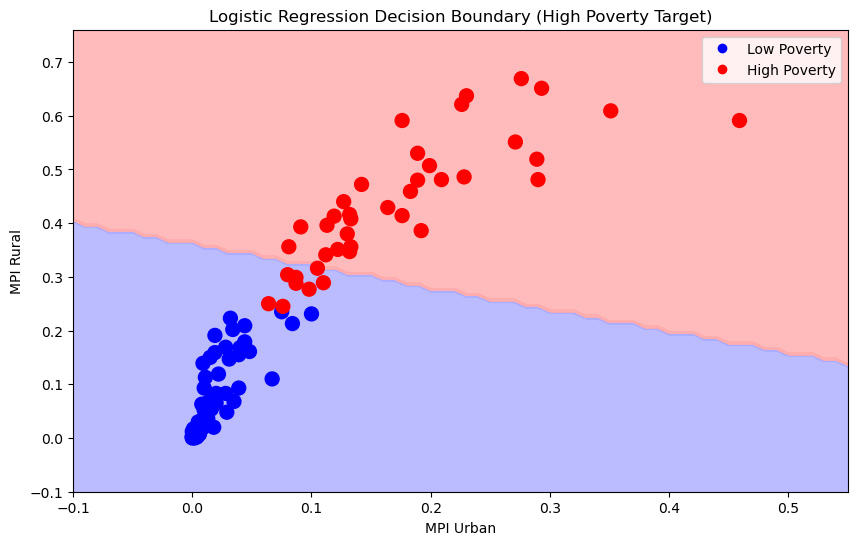

In [31]:
from matplotlib.colors import ListedColormap

# Using the target variable 'High Poverty' and features 'MPI Urban' and 'MPI Rural' for visualization
X_visualization = X[['MPI Urban', 'MPI Rural']]

# Defining the meshgrid for plotting decision boundaries
x_min, x_max = X_visualization['MPI Urban'].min() - 0.1, X_visualization['MPI Urban'].max() + 0.1
y_min, y_max = X_visualization['MPI Rural'].min() - 0.1, X_visualization['MPI Rural'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Training logistic regression using the two selected features
logistic_model_visual = LogisticRegression()
logistic_model_visual.fit(X_visualization, y)

# Predicting over the meshgrid to plot the decision boundary
Z = logistic_model_visual.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define the colors correctly
colors = ListedColormap(['#AAAAFF', '#FFAAAA'])  # light red for high, light blue for low

# Plotting the decision boundary based on the target variable
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=colors)
scatter = plt.scatter(X_visualization['MPI Urban'], X_visualization['MPI Rural'], c=y, s=100, cmap=ListedColormap(['blue', 'red']))

legend_labels = ['Low Poverty', 'High Poverty']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.title('Logistic Regression Decision Boundary (High Poverty Target)')
plt.xlabel('MPI Urban')
plt.ylabel('MPI Rural')
plt.show()

## Plotting Decision Boundary for Logistic Regression Model Using Intensity of Deprivation Urban and Intensity of Deprivation Rural Features

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


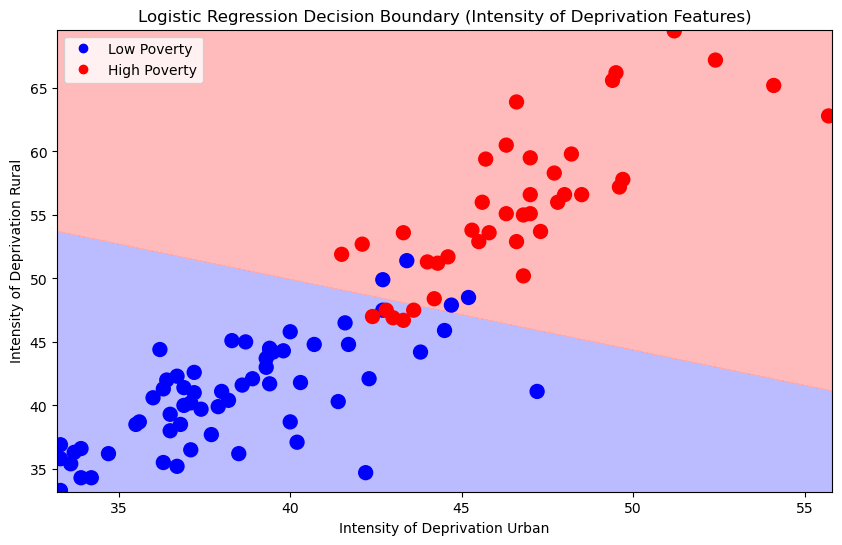

In [33]:
# Using the two features 'Intensity of Deprivation Urban' and 'Intensity of Deprivation Rural' for visualization
X_intensity = X[['Intensity of Deprivation Urban', 'Intensity of Deprivation Rural']]

# Defining the meshgrid for plotting decision boundaries
x_min, x_max = X_intensity['Intensity of Deprivation Urban'].min() - 0.1, X_intensity['Intensity of Deprivation Urban'].max() + 0.1
y_min, y_max = X_intensity['Intensity of Deprivation Rural'].min() - 0.1, X_intensity['Intensity of Deprivation Rural'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Training logistic regression using the two selected features
logistic_model_intensity = LogisticRegression()
logistic_model_intensity.fit(X_intensity, y)

# Predicting over the meshgrid to plot the decision boundary
Z_intensity = logistic_model_intensity.predict(np.c_[xx.ravel(), yy.ravel()])
Z_intensity = Z_intensity.reshape(xx.shape)

# Plotting the decision boundary based on the intensity features
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_intensity, alpha=0.8, cmap=ListedColormap(['#AAAAFF', '#FFAAAA']))

# Scatter plot with labels for the classes
scatter = plt.scatter(X_intensity['Intensity of Deprivation Urban'], 
                      X_intensity['Intensity of Deprivation Rural'], 
                      c=y, s=100, cmap=ListedColormap(['blue', 'red']),
                      label=['Low Poverty', 'High Poverty'])

legend_labels = ['Low Poverty', 'High Poverty']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.title('Logistic Regression Decision Boundary (Intensity of Deprivation Features)')
plt.xlabel('Intensity of Deprivation Urban')
plt.ylabel('Intensity of Deprivation Rural')
plt.show()